#Self Organizing Map


### Importing the libraries


In [240]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [241]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Feature Scaling


In [242]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
X = sc.fit_transform(X)

##Training the SOM


In [243]:
from minisom import MiniSom
som = MiniSom(10,
              10,
              X.shape[1],
              sigma=1.0,
              learning_rate=0.5)

som.random_weights_init(X)
som.train(X, 1000)

##Visualizing the results


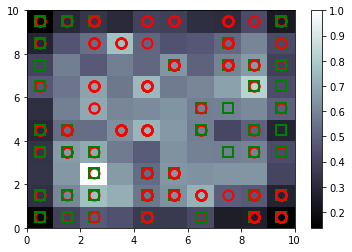

In [244]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i,j in enumerate(X):
    win_node = som.winner(j)
    plot(win_node[0] + 0.5,
         win_node[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

## Finding the frauds


In [245]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(1,1)], mappings[(4,1)]), axis = 0)
frauds = sc.inverse_transform(frauds)

##Printing the Fraunch Clients

In [246]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15777994
15704081
15677112
15722479
15810723
15730360
15703177
15733602
15728082
15693382
15768449
15752601
15740356
15599440
15597709
15642934
15615832
15594812
15681509
15591010
15587266
15567860
15625311
15604130
15668889
15590234
15620832
15624423
15604196
15613673
